In [68]:
# --- Traitement et manipulation de données ---
import pandas as pd
import numpy as np
import random
import glob
# --- Visualisation ---
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# --- Prétraitement & sélection ---
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict

# --- Évaluation des modèles ---
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix
)

# --- Modèles supervisés ---
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# --- Modèles non supervisés ---
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from scipy.stats import mode
import pickle
# --- Oversampling (équilibrage des classes) ---
from imblearn.over_sampling import SMOTE

# --- Deep Learning avec PyTorch ---
import torch
import torch.nn as nn
import torch.optim as optim



In [ ]:

# Mise à jour avec ton nouveau dossier
folder_path = r'C:\Users\Durant.Nguefack\Downloads\turnstile-usage-data/'
file_paths = glob.glob(folder_path + '*.csv')

# Vérifie si les fichiers sont bien détectés
print(f"{len(file_paths)} fichiers CSV détectés.")

# Lecture et concaténation
dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

df_copy1 = pd.concat(dfs, ignore_index=True)

# Vérification finale des colonnes
print(df_copy1.columns)


5 fichiers CSV détectés.


C:\Users\Durant.Nguefack\AppData\Local\Temp\ipykernel_14812\2188966771.py:11: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Durant.Nguefack\AppData\Local\Temp\ipykernel_14812\2188966771.py:11: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Durant.Nguefack\AppData\Local\Temp\ipykernel_14812\2188966771.py:11: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Durant.Nguefack\AppData\Local\Temp\ipykernel_14812\2188966771.py:11: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Index(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division', 'Date',
       'Time', 'Description', 'Entries',
       'Exits                                                     '],
      dtype='object')


# Exploration des données

In [4]:
df_copy=df_copy1
# Affichage des noms des colonnes
df_copy.columns


Index(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division', 'Date',
       'Time', 'Description', 'Entries',
       'Exits                                                     '],
      dtype='object')

In [5]:
# Affichage des premières lignes du DataFrame
df_copy.head()


,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,2014-12-31T00:00:00.000,23:00:00,REGULAR,4943320,1674736
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,2014-12-31T00:00:00.000,19:00:00,REGULAR,4943145,1674709
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,2014-12-31T00:00:00.000,15:00:00,REGULAR,4942439,1674636
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,2014-12-31T00:00:00.000,11:00:00,REGULAR,4942012,1674547
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,2014-12-31T00:00:00.000,10:21:51,REGULAR,4941987,1674518


In [6]:
# Informations générales sur le DataFrame (types de données, valeurs manquantes, etc.)
df_copy.info()

# Affichage du nombre de lignes et de colonnes
df_copy.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49244141 entries, 0 to 49244140
Data columns (total 11 columns):
 #   Column                                                      Dtype 
---  ------                                                      ----- 
 0   C/A                                                         object
 1   Unit                                                        object
 2   SCP                                                         object
 3   Station                                                     object
 4   Line Name                                                   object
 5   Division                                                    object
 6   Date                                                        object
 7   Time                                                        object
 8   Description                                                 object
 9   Entries                                                     int64 
 10  Exits           

(49244141, 11)

In [7]:
# Affichage de statistiques descriptives sur les données numériques
df_copy.describe()



,Entries,Exits
count,4.924414e+07,4.924414e+07
mean,2.600299e+07,2.149567e+07
std,1.627312e+08,1.477743e+08
min,0.000000e+00,0.000000e+00
25%,5.465440e+05,3.300210e+05
50%,2.767694e+06,1.646730e+06
75%,7.243818e+06,5.483122e+06
max,2.144893e+09,2.146093e+09


In [8]:
# Comptage des valeurs manquantes par colonne
df_copy.isnull().sum()

C/A                                                           0
Unit                                                          0
SCP                                                           0
Station                                                       0
Line Name                                                     0
Division                                                      0
Date                                                          0
Time                                                          0
Description                                                   0
Entries                                                       0
Exits                                                         0
dtype: int64

# Nettoyage des données

In [9]:
# S'assurer que les noms de colonnes n'ont pas d'espaces et sont bien formatés
df_copy.columns = df_copy.columns.str.strip().str.upper()


In [10]:
# Création de la colonne TURNSTILE (identifiant unique de chaque tourniquet)
df_copy["TURNSTILE"] = df_copy["C/A"] + "-" + df_copy["UNIT"] + "-" + df_copy["SCP"]

In [11]:
#  Convertir DATE en string juste pour concaténer
df_copy["DATETIME"] = df_copy["DATE"].astype(str).str.slice(0, 10) + " " + df_copy["TIME"]



In [12]:
# reconvertir proprement en datetime
df_copy["DATETIME"] = pd.to_datetime(df_copy["DATETIME"], format="%Y-%m-%d %H:%M:%S", errors="coerce")

In [13]:
# Extraire des composantes de date utiles
df_copy['DAY_NAME'] = df_copy['DATETIME'].dt.day_name()
df_copy['HOUR'] = df_copy['DATETIME'].dt.hour
df_copy['YEAR'] = df_copy['DATETIME'].dt.year
df_copy['MONTH_NAME'] = df_copy['DATETIME'].dt.month_name()


In [14]:

df_copy.head()

,C/A,UNIT,SCP,STATION,LINE NAME,DIVISION,DATE,TIME,DESCRIPTION,ENTRIES,EXITS,TURNSTILE,DATETIME,DAY_NAME,HOUR,YEAR,MONTH_NAME
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,2014-12-31T00:00:00.000,23:00:00,REGULAR,4943320,1674736,A002-R051-02-00-00,2014-12-31 23:00:00,Wednesday,23,2014,December
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,2014-12-31T00:00:00.000,19:00:00,REGULAR,4943145,1674709,A002-R051-02-00-00,2014-12-31 19:00:00,Wednesday,19,2014,December
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,2014-12-31T00:00:00.000,15:00:00,REGULAR,4942439,1674636,A002-R051-02-00-00,2014-12-31 15:00:00,Wednesday,15,2014,December
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,2014-12-31T00:00:00.000,11:00:00,REGULAR,4942012,1674547,A002-R051-02-00-00,2014-12-31 11:00:00,Wednesday,11,2014,December
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,2014-12-31T00:00:00.000,10:21:51,REGULAR,4941987,1674518,A002-R051-02-00-00,2014-12-31 10:21:51,Wednesday,10,2014,December


# CALCUL DU TRAFIC ENTRE DEUX RELEVES

In [15]:
# Trier les données pour chaque tourniquet
df_copy.sort_values(['TURNSTILE', 'DATETIME'], inplace=True)


In [16]:
# Calcul des entrees/sorties réelles
df_copy['FOUR_HOUR_ENTRIES'] = df_copy.groupby('TURNSTILE')['ENTRIES'].diff().fillna(0)
df_copy['FOUR_HOUR_EXITS'] = df_copy.groupby('TURNSTILE')['EXITS'].diff().fillna(0)


In [17]:
#  Nettoyage des valeurs aberrantes
# Prendre un échantillon de 500 000 lignes (modifiable)
df_sample = df_copy.sample(n=500_000, random_state=42)

# Appliquer le nettoyage uniquement sur l'échantillon
df_sample = df_sample.loc[
    (df_sample['FOUR_HOUR_ENTRIES'].between(0, 10000)) &
    (df_sample['FOUR_HOUR_EXITS'].between(0, 10000))
]


In [65]:

# Ajouter la colonne STATION en s'appuyant sur l'index d'origine
df_sample["STATION"] = df_copy["STATION"].loc[df_sample.index]


In [19]:
# Ajout du trafic total
df_sample["FOOT_TRAFFIC"] = df_sample["FOUR_HOUR_ENTRIES"] + df_sample["FOUR_HOUR_EXITS"]


# GRAPHIQUES D'ANALYSE

Evolution quotidienne du trafic (trafic global par date)

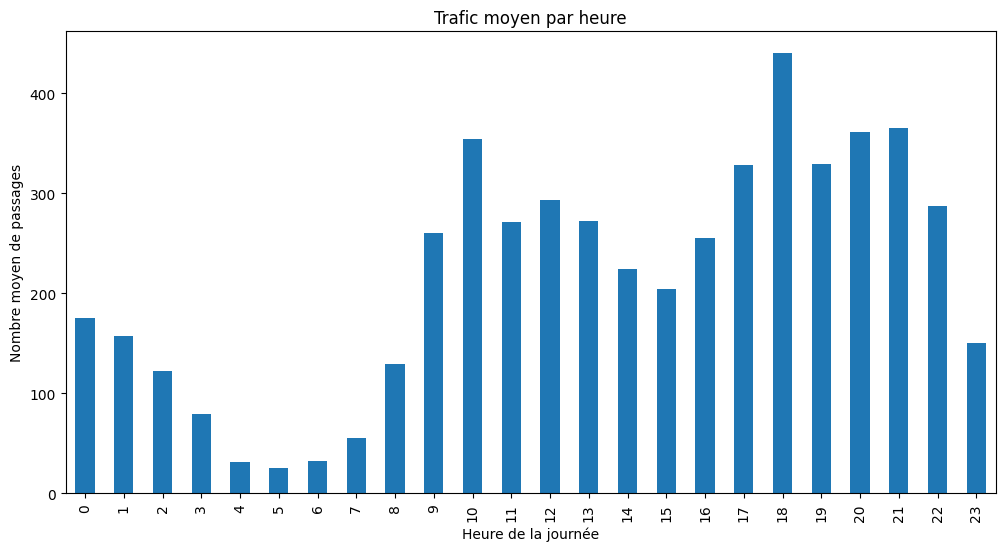

In [20]:
# Exemple de visualisation à ajouter
plt.figure(figsize=(12,6))
df_sample.groupby('HOUR')['FOOT_TRAFFIC'].mean().plot(kind='bar')
plt.title('Trafic moyen par heure')
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre moyen de passages')
plt.show()

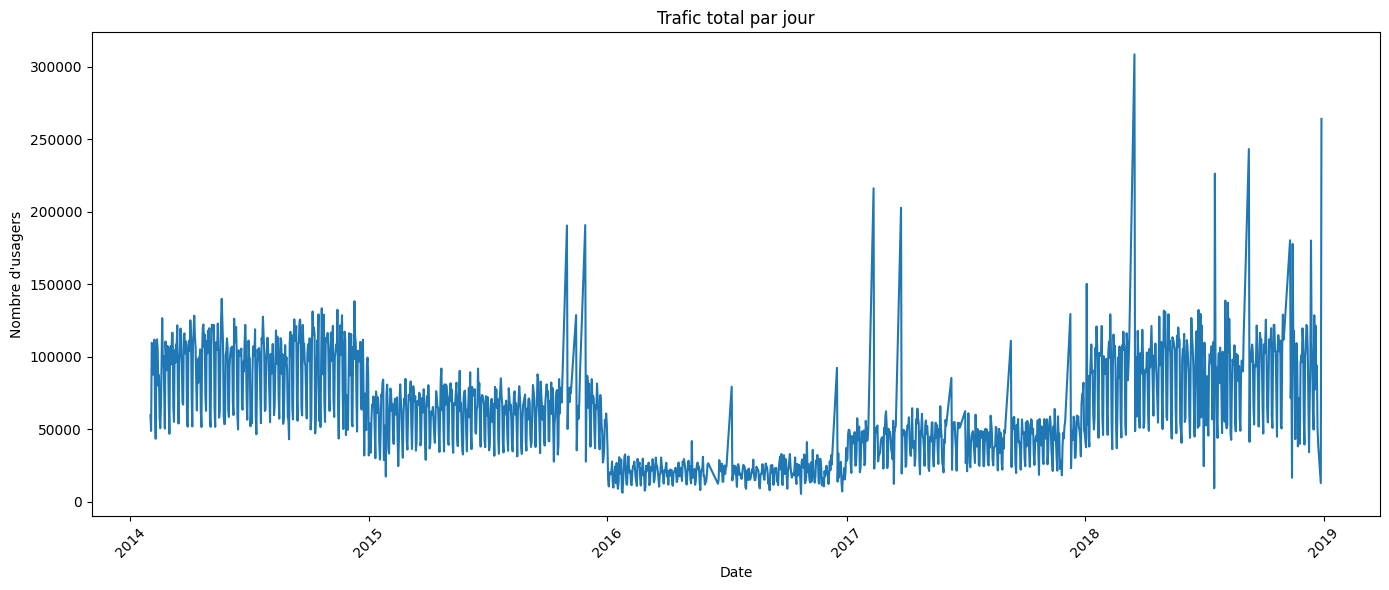

In [21]:
df_sample['DATE'] = pd.to_datetime(df_sample['DATE'])
daily = df_sample.groupby('DATE')["FOOT_TRAFFIC"].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily, x='DATE', y='FOOT_TRAFFIC')
plt.title("Trafic total par jour")
plt.xlabel("Date")
plt.ylabel("Nombre d'usagers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Repartition du trafic par jour de la semaine

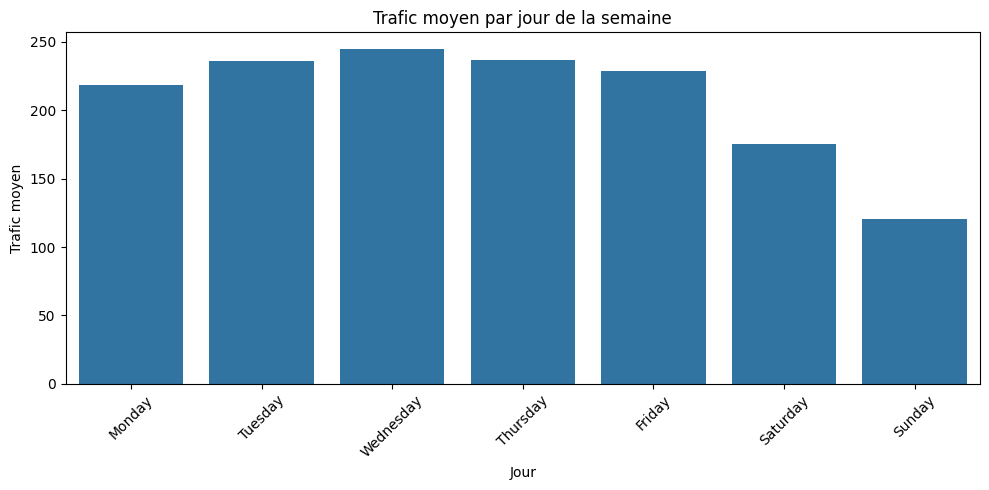

In [22]:
df_sample['DAY_NAME'] = df_sample['DATETIME'].dt.day_name()
weekly = df_sample.groupby('DAY_NAME')["FOOT_TRAFFIC"].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 5))
sns.barplot(x=weekly.index, y=weekly.values)
plt.title("Trafic moyen par jour de la semaine")
plt.ylabel("Trafic moyen")
plt.xlabel("Jour")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualisation des stations avec le plus de trafic

C:\Users\Durant.Nguefack\AppData\Local\Temp\ipykernel_14812\3506771699.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_stations, x='FOOT_TRAFFIC', y='STATION', palette='viridis')


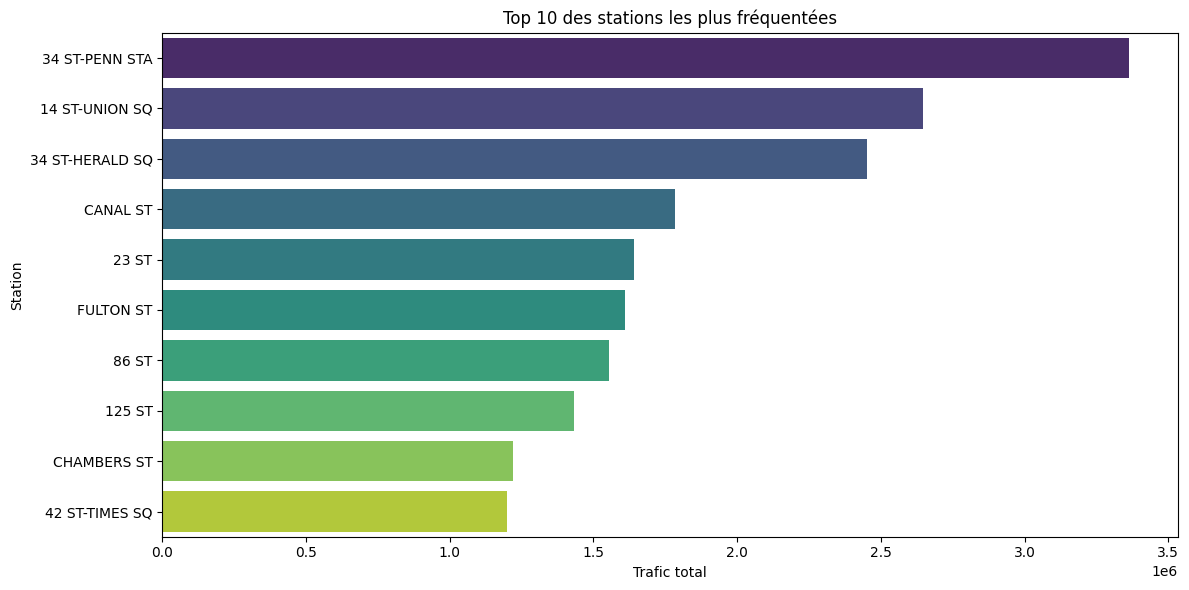

In [23]:
top_stations = df_sample.groupby('STATION')["FOOT_TRAFFIC"].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_stations, x='FOOT_TRAFFIC', y='STATION', palette='viridis')
plt.title("Top 10 des stations les plus fréquentées")
plt.xlabel("Trafic total")
plt.ylabel("Station")
plt.tight_layout()
plt.show()


Boxplot du trafic par heure

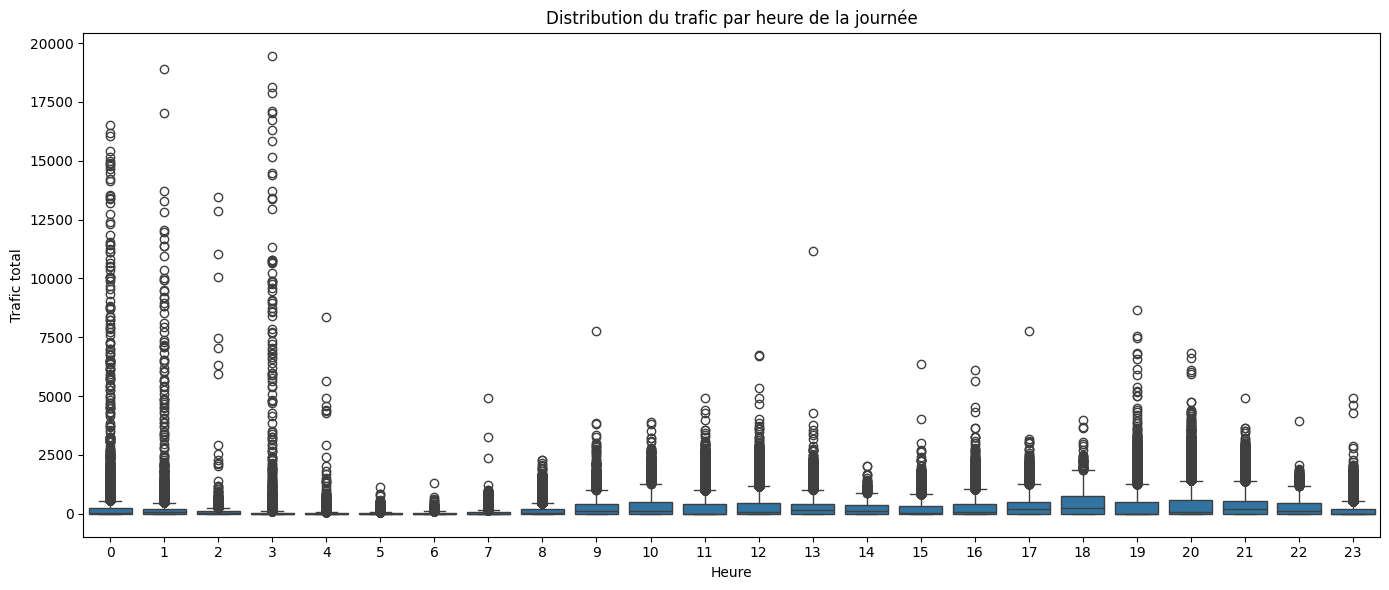

In [24]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_sample, x='HOUR', y='FOOT_TRAFFIC')
plt.title("Distribution du trafic par heure de la journée")
plt.xlabel("Heure")
plt.ylabel("Trafic total")
plt.tight_layout()
plt.show()

Analyse du trafic par heure et par jour de la semaine

In [25]:
# 4. Créer un tableau croisé (pivot table) du trafic moyen par heure et par jour de la semaine
pivot_table = df_sample.pivot_table(index='HOUR', columns='DAY_NAME', values='FOOT_TRAFFIC', aggfunc='mean')

# Réindexer les lignes de 0 à 23 pour inclure toutes les heures (même celles éventuellement manquantes dans les données)
pivot_table = pivot_table.reindex(range(0, 24), axis=0)

# Réindexer les colonnes dans l'ordre chronologique des jours de la semaine
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot_table = pivot_table.reindex(days_order, axis=1)

# Remplacer les valeurs manquantes éventuelles par 0 (aucun trafic enregistré)
pivot_table = pivot_table.fillna(0)

# Afficher un aperçu du tableau résultant
print(pivot_table.head(5))  # affiche les moyennes pour les premières heures (0 à 4) en exemple


DAY_NAME      Monday     Tuesday   Wednesday    Thursday      Friday  \
HOUR                                                                   
0         101.355771  149.404199  172.063466  162.536288  180.963274   
1          90.432197  118.208381  155.253704  137.098025  152.119700   
2          58.225895   67.969231   78.089506   88.543662  110.433803   
3          28.201319   39.022727   71.475106   40.885958   87.691334   
4          22.725527   23.306826   24.769975   27.179165   29.169056   

DAY_NAME    Saturday      Sunday  
HOUR                              
0         312.169290  146.277543  
1         318.212766  131.974095  
2         347.487879  115.227027  
3         235.013642   53.486980  
4          51.016236   42.707616  


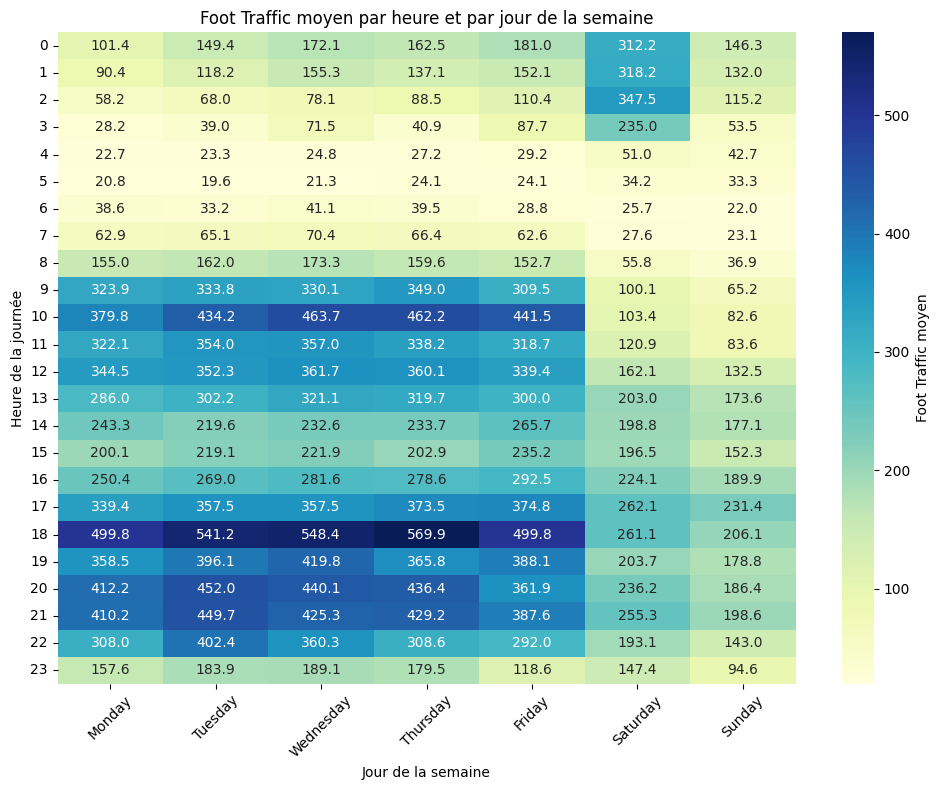

In [26]:
# 5. Création de la figure heatmap
plt.figure(figsize=(10, 8))  # définir une taille de figure adéquate

#la heatmap avec annotations
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={"label": "Foot Traffic moyen"})

# Ajouter le titre et les labels des axes
plt.title("Foot Traffic moyen par heure et par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Heure de la journée")


plt.xticks(rotation=45)   # rotation des noms de jours sur l'axe des X
plt.yticks(rotation=0)    # garder les heures verticales (0°)

plt.tight_layout()       

# Afficher la figure
plt.show()


Trafic de pointe en semaine (Lundi → Vendredi) :

Il y a deux photos très nettes :

entre 8h et 9h du matin (heure de pointe du matin)

entre 17h et 19h (heure de pointe du soir)

Ces heures correspondant aux déplacements domicile-travail .

Week-ends (Samedi et Dimanche) :

Le trafic est moins élevé et plus réparti sur la journée.

Le pic est plus tardif (autour de 14h-16h), ce qui reflète des habitudes différentes (shopping, loisirs).

Nuit (0h → 5h) :

Le trafic est naturellement très faible pendant les heures de la nuit.


 Interprétations concrètes
Heures creuses : 1h → 5h du matin tous les jours

Plus forte affluence : Mercredi entre 18h et 19h ( 569.9)

Moins de trafic : Dimanche matin très tôt ( 23.1 à 33.3entre 3h et 6h)

Mardi et Mercredi montrent les trafics les plus intenses parmi les jours de la semaine.

# Ajout de l'année, du mois et du jour

In [27]:
df_copy["YEAR"] = df_copy["DATETIME"].dt.year
df_copy["MONTH"] = df_copy["DATETIME"].dt.month    
df_copy["DAYOFWEEK"] = df_copy["DATETIME"].dt.weekday 


# Analyse du trafic moyen par année

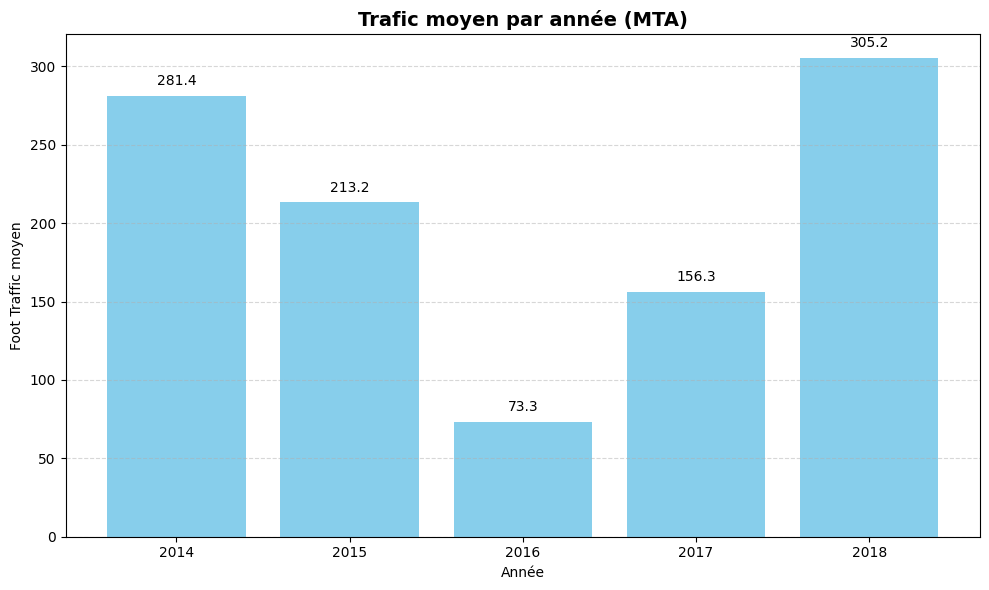

In [28]:


# 1. Extraire l'année depuis la colonne 'DATETIME'
df_sample['YEAR'] = df_sample['DATETIME'].dt.year

# 2. Grouper par année et calculer le trafic moyen
yearly_traffic = df_sample.groupby('YEAR')['FOOT_TRAFFIC'].mean().reset_index()

# 3. Création du graphique
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_traffic['YEAR'], yearly_traffic['FOOT_TRAFFIC'], color='skyblue')

# Ajouter les étiquettes sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 1), ha='center', va='bottom')

# 4. Mise en forme
plt.title("Trafic moyen par année (MTA)", fontsize=14, fontweight='bold')
plt.xlabel("Année")
plt.ylabel("Foot Traffic moyen")
plt.xticks(yearly_traffic['YEAR'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


C:\Users\Durant.Nguefack\AppData\Local\Temp\ipykernel_14812\3723072281.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="FOUR_HOUR_ENTRIES", y="STATION", orient = "h", data=entriesTop10St, ci=None, palette = "Reds_d")
C:\Users\Durant.Nguefack\AppData\Local\Temp\ipykernel_14812\3723072281.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="FOUR_HOUR_ENTRIES", y="STATION", orient = "h", data=entriesTop10St, ci=None, palette = "Reds_d")


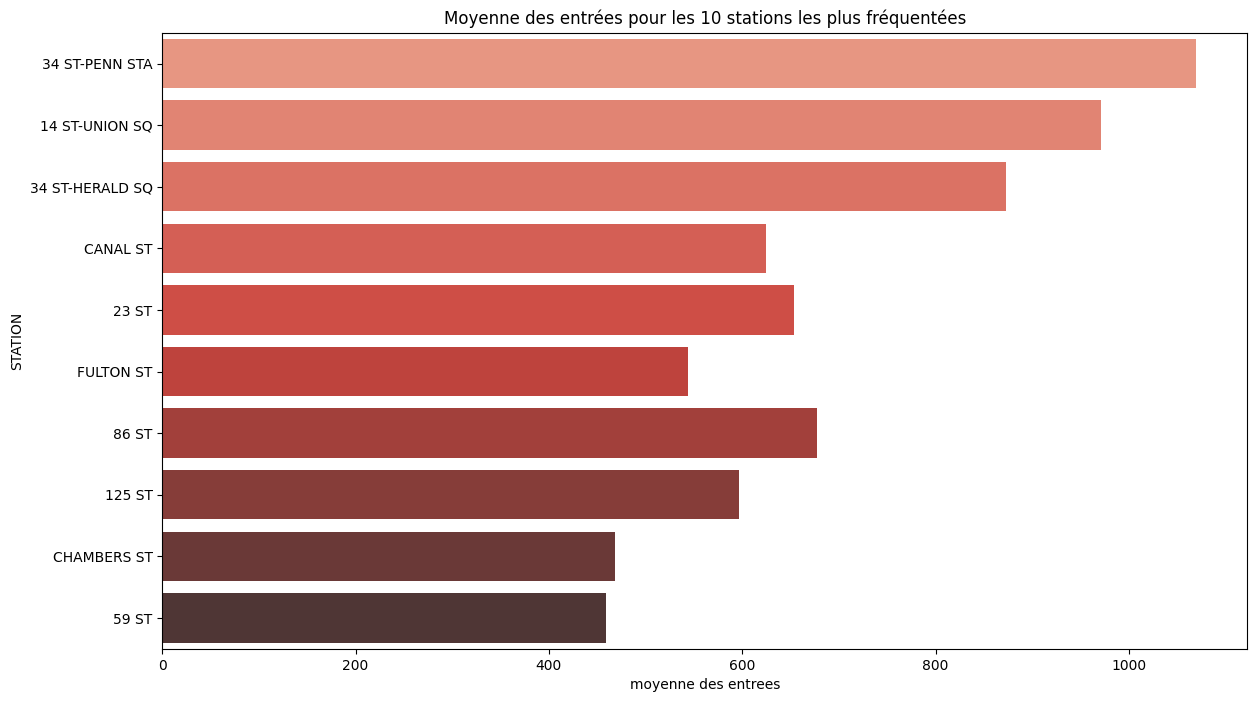

In [29]:
#Avg Entries For Top 10 Stations
entriesByStDt = df_sample.groupby(['STATION','DATE','DAY_NAME']).FOUR_HOUR_ENTRIES.sum().reset_index()

top10St = entriesByStDt.groupby('STATION').FOUR_HOUR_ENTRIES.sum().reset_index().nlargest(10,'FOUR_HOUR_ENTRIES')[['STATION']]

entriesTop10St = top10St.merge(entriesByStDt, on='STATION')

plt.figure(figsize=(14, 8))
plt.title("Moyenne des entrées pour les 10 stations les plus fréquentées")
ax = sns.barplot(x="FOUR_HOUR_ENTRIES", y="STATION", orient = "h", data=entriesTop10St, ci=None, palette = "Reds_d")
ax.set(xlabel='moyenne des entrees', ylabel='STATION')

plt.savefig('AverageEntriesForTop10Stations.png', dpi=1000)

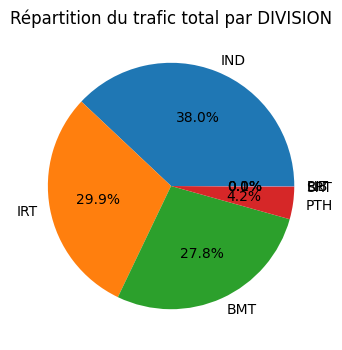

In [30]:
division_traffic = df_sample.groupby("DIVISION")["FOOT_TRAFFIC"].sum().sort_values(ascending=False)
division_traffic.plot(kind="pie", autopct='%1.1f%%', figsize=(4, 4))
plt.title("Répartition du trafic total par DIVISION")
plt.ylabel("")
plt.show()

Ce graphique montre que le trafic du métro new-yorkais est concentré à plus de 95 % sur les trois principales divisions historiques : IND, IRT, et BMT.



 Corrélation entre entrées et sorties (par période de 4h)

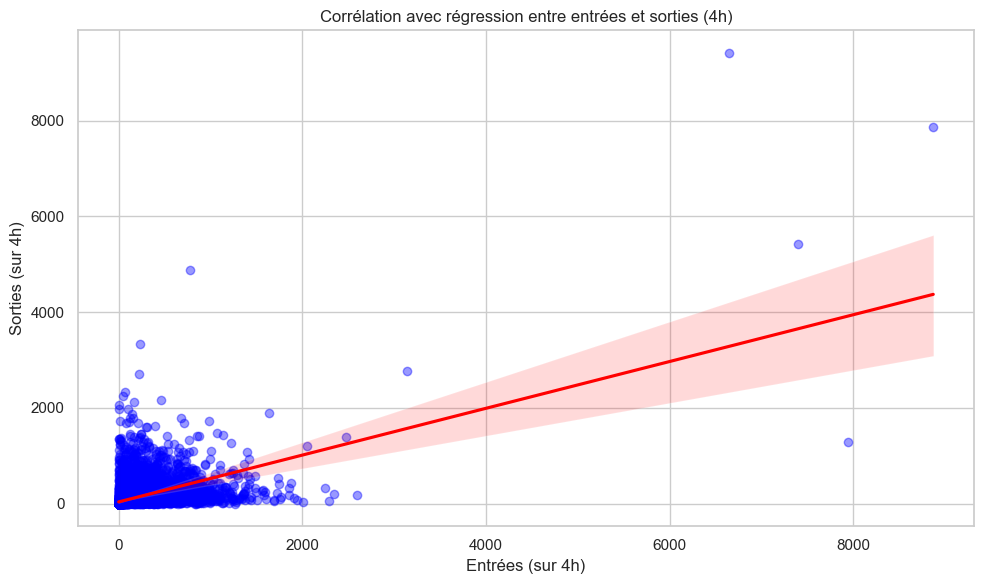

In [31]:

# Optionnel : limiter à un sous-échantillon aléatoire pour performance (ex. 10 000 lignes)
sample = df_sample.sample(n=10000, random_state=42)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Scatterplot avec régression linéaire
sns.regplot(
    x="FOUR_HOUR_ENTRIES",
    y="FOUR_HOUR_EXITS",
    data=sample,
    scatter_kws={'alpha':0.4, 'color': 'blue'},  # points translucides
    line_kws={'color': 'red'},  # ligne de régression
)

plt.title("Corrélation avec régression entre entrées et sorties (4h)")
plt.xlabel("Entrées (sur 4h)")
plt.ylabel("Sorties (sur 4h)")
plt.tight_layout()
plt.show()


In [32]:
correlation = sample["FOUR_HOUR_ENTRIES"].corr(sample["FOUR_HOUR_EXITS"])
print(f"Coefficient de corrélation de Pearson : {correlation:.3f}")


Coefficient de corrélation de Pearson : 0.545


Coefficient de corrélation (Pearson) : 0.545
Cela indique une corrélation modérée positive entre les entrées et les sorties, ce qui signifie que généralement, lorsque le nombre d'entrées augmente, le nombre de sorties augmente également, mais cette relation n'est pas très forte.

Dispersion importante des points
On observe une grande variabilité, ce qui signifie qu'il ya de nombreux cas où le nombre d'entrées ne correspond pas essentiellement au nombre de sorties :

Certaines stations montrent une fréquentation très déséquilibrée (beaucoup plus d'entrées que de sorties ou inversement).

Quelques points isolés montrent des comportements extrêmes (très forts écarts entrées-sorties), probablement liés à des événements spéciaux ou à des stations très spécifiques.

# Modelisation  non supervise

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINE NAME', 'DIVISION', 'DATE',
       'TIME', 'DESCRIPTION', 'ENTRIES', 'EXITS', 'TURNSTILE', 'DATETIME',
       'DAY_NAME', 'HOUR', 'YEAR', 'MONTH_NAME', 'FOUR_HOUR_ENTRIES',
       'FOUR_HOUR_EXITS', 'FOOT_TRAFFIC'],
      dtype='object')


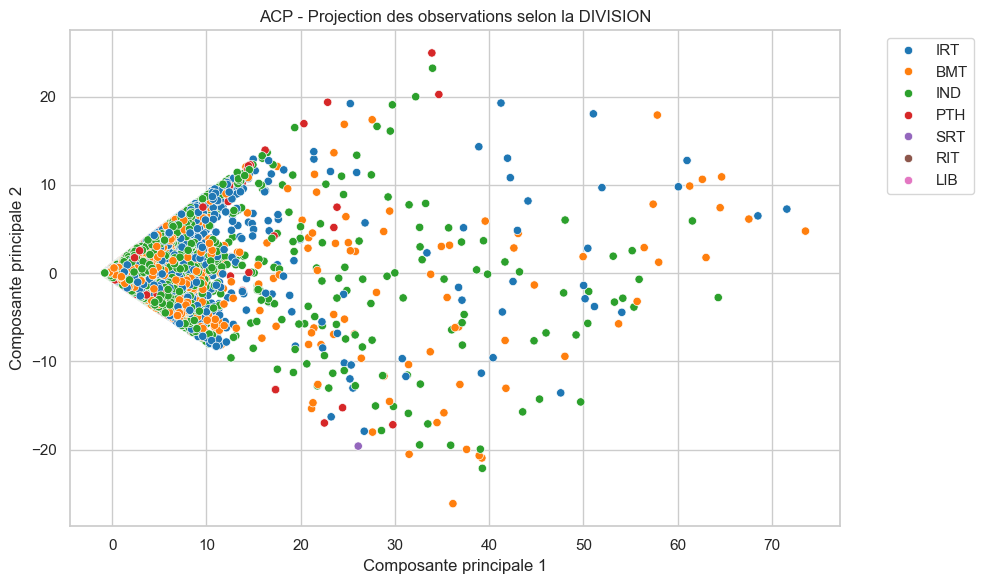

In [33]:
# Étape 1 : Vérifie si 'DIVISION' est bien là
print(df_sample.columns)

# Étape 2 : Filtrage uniquement sur les colonnes nécessaires
features = ['FOUR_HOUR_ENTRIES', 'FOUR_HOUR_EXITS', 'FOOT_TRAFFIC']
if all(col in df_sample.columns for col in features + ['DIVISION']):
    df_acp = df_sample.dropna(subset=features + ['DIVISION']).copy()

    # Normalisation des colonnes
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_acp[features])

    # Application de l'ACP
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    components = pca.fit_transform(X_scaled)

    df_acp['PC1'] = components[:, 0]
    df_acp['PC2'] = components[:, 1]

    # Visualisation
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_acp, x='PC1', y='PC2', hue='DIVISION', palette='tab10')
    plt.title("ACP - Projection des observations selon la DIVISION")
    plt.xlabel("Composante principale 1")
    plt.ylabel("Composante principale 2")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Les colonnes nécessaires pour l'ACP ne sont pas toutes présentes.")


Cette analyse montre clairement que la fréquentation des stations ne dépend pas strictement de la division administrative, mais varie fortement selon des caractéristiques intrinsèques à chaque station (localisation géographique, proximité d’attractions, quartiers résidentiels ou commerciaux).

Ce graphique montre clairement que :

Les stations ne sont pas séparées selon leur division : toutes les divisions ont des stations à fréquentation faible, moyenne et forte.

Quelques regroupements sont visibles , indiquant certains profils spécifiques (ex. groupe central dense correspondant à un profil standard de trafic moyen à faible).

La plupart des observations se concentrent à gauche , indiquant que la majorité des relevés concernent un trafic modéré ou faible.



Standardisation des données

In [34]:

# Sélection des variables pour le clustering
features = ["FOUR_HOUR_ENTRIES", "FOUR_HOUR_EXITS", "FOOT_TRAFFIC"]
X = df_sample[features].copy()
#  Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


 Méthode du coude

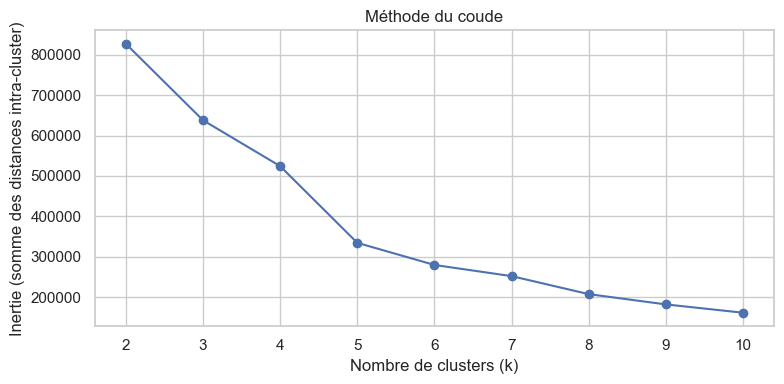

In [35]:

inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (somme des distances intra-cluster)")
plt.grid(True)
plt.tight_layout()
plt.show()

la methode de coude ici nous permet de choisir 4 clusters

 Score de silhouette pour chaque k

In [36]:
# Échantillon aléatoire pour le score (5000 points max)
X_subset = X_scaled[np.random.choice(X_scaled.shape[0], size=min(5000, X_scaled.shape[0]), replace=False)]

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(X_subset)
    score = silhouette_score(X_subset, labels)
    print(f"Silhouette score pour k={k} : {score:.4f}")

Silhouette score pour k=2 : 0.7483
Silhouette score pour k=3 : 0.6999
Silhouette score pour k=4 : 0.6912
Silhouette score pour k=5 : 0.6947
Silhouette score pour k=6 : 0.6947
Silhouette score pour k=7 : 0.6805
Silhouette score pour k=8 : 0.6721
Silhouette score pour k=9 : 0.6702
Silhouette score pour k=10 : 0.6657


« Le score de silhouette indique une meilleure qualité de séparation avec 2 clusters, mais en tenant compte de l'objectif pratique (analyser finement différents profils de stations), le choix de 4 clusters issu de la méthode du coude reste tout à fait pertinent. Ce choix assure un bon compromis entre qualité de regroupement et interprétabilité métier. »

 ACP + Clustering K-means et Visualisation des clusters

In [37]:
# Réduction de dimension
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-means avec k=4 (choisi selon coude/silhouette)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)

# Ajout au DataFrame
df_sample["Cluster"] = clusters
df_pca = df_sample.copy()
df_pca["PCA1"] = X_pca[:, 0]
df_pca["PCA2"] = X_pca[:, 1]


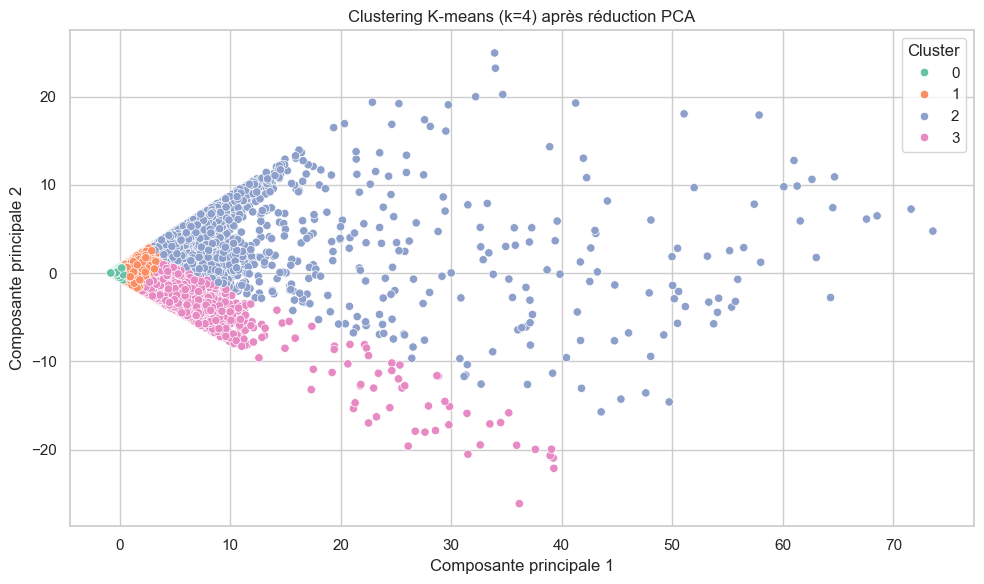

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PCA1", y="PCA2", hue="Cluster", palette="Set2")
plt.title("Clustering K-means (k=4) après réduction PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

Clustering K-means et DBSCAN sur des données PCA (2 composantes principales)

In [39]:
# Conversion du tableau PCA en DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

# Ensuite, tu peux extraire l’échantillon
X_subset = X_pca_df.iloc[:10000, :].copy()

# Vérification rapide
print(X_subset.head())


        PC1       PC2
0 -0.787666  0.015771
1 -0.423041 -0.004413
2 -0.795014  0.021132
3 -0.795014  0.021132
4 -0.418474  0.010693


In [40]:
# Configuration et entraînement du modèle K-means pour k=4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_subset[['PC1', 'PC2']])  # entraînement sur les deux composantes principales

# Récupération des étiquettes de cluster pour chaque point
X_subset['KMeans_Cluster'] = kmeans.labels_

# Aperçu des clusters K-means assignés (quelques premières lignes)
print(X_subset[['PC1', 'PC2', 'KMeans_Cluster']].head())

        PC1       PC2  KMeans_Cluster
0 -0.787666  0.015771               0
1 -0.423041 -0.004413               0
2 -0.795014  0.021132               0
3 -0.795014  0.021132               0
4 -0.418474  0.010693               0


In [41]:
# Configuration et entraînement du modèle DBSCAN 
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(X_subset[['PC1', 'PC2']])  # ajustement sur les deux composantes principales

# Récupération des labels DBSCAN pour chaque point
X_subset['DBSCAN_Label'] = dbscan.labels_

# Aperçu des labels DBSCAN assignés (quelques premières lignes)
print(X_subset[['PC1', 'PC2', 'DBSCAN_Label']].head())


        PC1       PC2  DBSCAN_Label
0 -0.787666  0.015771             0
1 -0.423041 -0.004413             0
2 -0.795014  0.021132             0
3 -0.795014  0.021132             0
4 -0.418474  0.010693             0


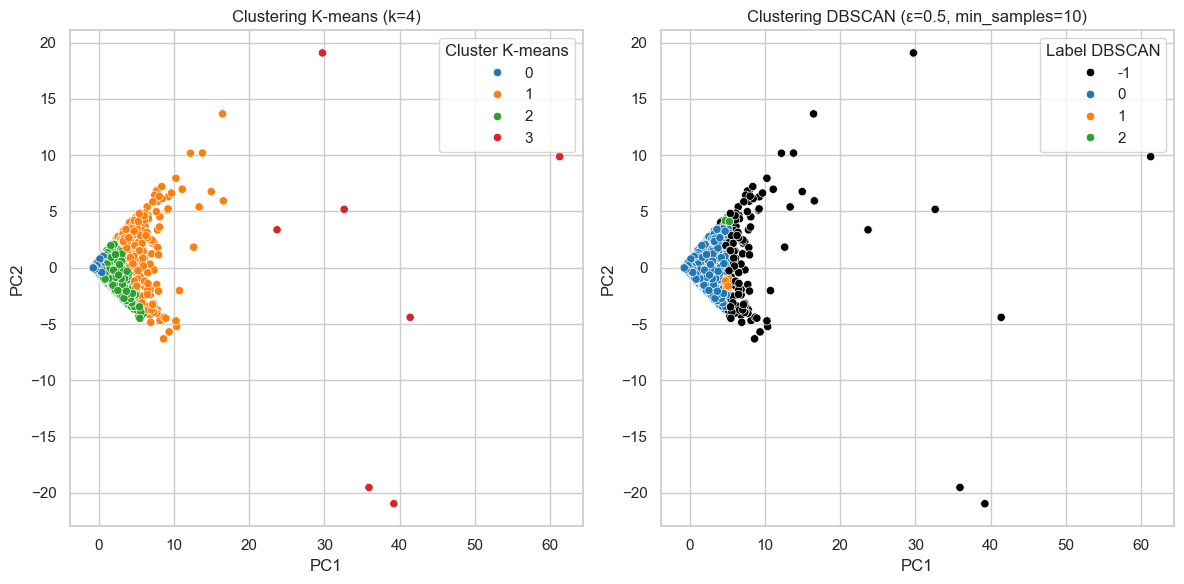

In [42]:
# Préparation d'une palette de couleurs pour DBSCAN 
# (on veut distinguer clairement les outliers en les affichant en noir)
unique_labels = set(X_subset['DBSCAN_Label'])
cluster_labels = [label for label in unique_labels if label != -1]  # exclut le bruit
cluster_labels.sort()
# Palette de couleurs pour les clusters DBSCAN (sans le bruit)
palette_clusters = sns.color_palette("tab10", n_colors=len(cluster_labels))
# Dictionnaire de correspondance label -> couleur
color_map = {label: color for label, color in zip(cluster_labels, palette_clusters)}
if -1 in unique_labels:
    color_map[-1] = "black"  # le bruit (outliers) sera en noir

# Création de la figure avec deux sous-graphiques côte à côte
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Graphique 1: Clustering K-means (4 clusters)
sns.scatterplot(ax=axes[0], data=X_subset, x='PC1', y='PC2', 
                hue='KMeans_Cluster', palette='tab10', legend='full')
axes[0].set_title("Clustering K-means (k=4)")
axes[0].legend(title="Cluster K-means")

# Graphique 2: Clustering DBSCAN (anomalies en noir)
sns.scatterplot(ax=axes[1], data=X_subset, x='PC1', y='PC2', 
                hue='DBSCAN_Label', palette=color_map, legend='full')
axes[1].set_title("Clustering DBSCAN (ε=0.5, min_samples=10)")
axes[1].legend(title="Label DBSCAN")

# Affichage des deux graphiques
plt.tight_layout()  # ajuste les marges pour une présentation propre
plt.show()


Analyse qualitative des clusters

In [43]:
# Moyenne des variables numériques
print(df_sample.groupby("Cluster")[features].mean())

# Composition par division
print("\nComposition par division :")
print(df_sample.groupby("Cluster")["DIVISION"].value_counts(normalize=True).unstack().round(2))

# Composition par C/A
print("\nComposition par C/A :")
print(df_sample.groupby("Cluster")["C/A"].value_counts(normalize=True).unstack().fillna(0).round(2))

# Top 5 stations par cluster
print("\nTop 5 stations par cluster :")
top_stations = df_sample.groupby(["Cluster", "STATION"]).size().sort_values(ascending=False).groupby(level=0).head(5)
print(top_stations)

# Répartition par jour
print("\nRépartition par jour :")
print(df_sample.groupby("Cluster")["DAY_NAME"].value_counts(normalize=True).unstack().round(2))


         FOUR_HOUR_ENTRIES  FOUR_HOUR_EXITS  FOOT_TRAFFIC
Cluster                                                  
0                26.942705        21.576453     48.519157
1               301.762511       250.303946    552.066457
2               499.487819      1335.239441   1834.727260
3              1002.180137       272.580907   1274.761043

Composition par division :
DIVISION   BMT   IND   IRT  LIB   PTH  RIT   SRT
Cluster                                         
0         0.18  0.45  0.31  0.0  0.05  0.0  0.01
1         0.29  0.37  0.30  NaN  0.04  0.0  0.00
2         0.24  0.37  0.33  NaN  0.06  NaN   NaN
3         0.26  0.39  0.32  NaN  0.04  0.0  0.00

Composition par C/A :
C/A      A002  A006  A007  A010  A011  A013  A014  A015  A016  A021  ...  \
Cluster                                                              ...   
0         0.0   0.0   0.0  0.00   0.0  0.00   0.0   0.0   0.0  0.00  ...   
1         0.0   0.0   0.0  0.00   0.0  0.00   0.0   0.0   0.0  0.00  ...   
2  

 Description des clusters

In [44]:
# Basé sur les moyennes observées
descriptions = {
    0: "Stations résidentielles (faible trafic)",
    1: "Gares modérées (trafic moyen)",
    2: "Zones de bureaux / commerciales (sorties massives)",
    3: "Grands hubs / centres touristiques (trafic élevé)"
}

for cluster_id, desc in descriptions.items():
    print(f"Cluster {cluster_id} : {desc}")


Cluster 0 : Stations résidentielles (faible trafic)
Cluster 1 : Gares modérées (trafic moyen)
Cluster 2 : Zones de bureaux / commerciales (sorties massives)
Cluster 3 : Grands hubs / centres touristiques (trafic élevé)


Graphique en barres (trafic moyen par cluster)

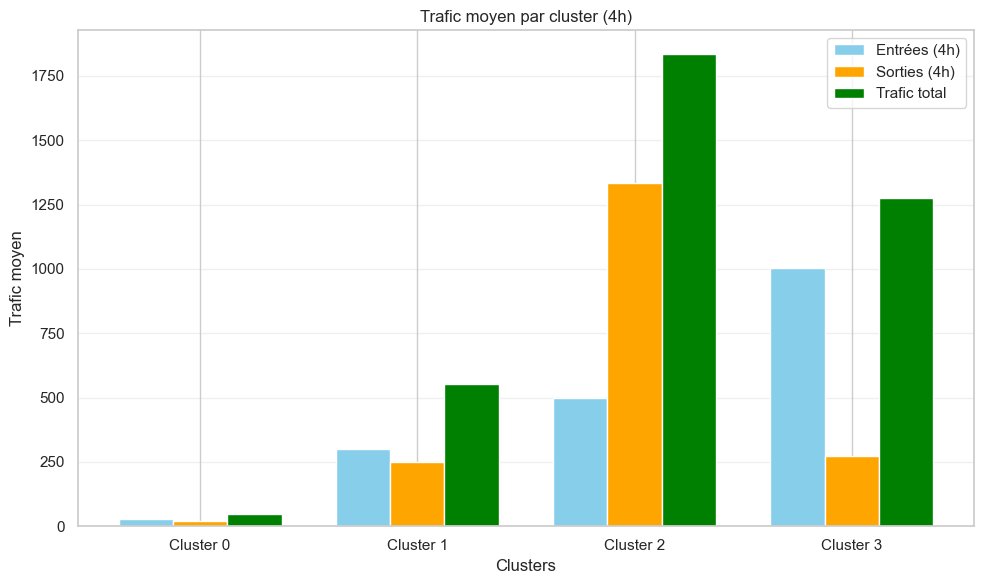

In [45]:


# Données issues de ton tableau
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
entries = [26.94, 301.76, 499.49, 1002.18]
exits = [21.58, 250.30, 1335.24, 272.58]
traffic_total = [48.52, 552.07, 1834.73, 1274.76]

x = np.arange(len(clusters))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, entries, width, label='Entrées (4h)', color='skyblue')
ax.bar(x, exits, width, label='Sorties (4h)', color='orange')
ax.bar(x + width, traffic_total, width, label='Trafic total', color='green')

ax.set_xlabel('Clusters')
ax.set_ylabel('Trafic moyen')
ax.set_title('Trafic moyen par cluster (4h)')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()

plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()


Ce graphique permet de distinguer clairement quatre profils de fréquentation des stations de métro, regroupés selon les clusters identifiés par l'analyse :

Cluster 0 (très faible fréquentation)Le:
Le trafic total (entrées et sorties) est très limité. Ce sont des stations secondaires ou périphériques, peu utilisées par les usagers.

Cluster 1 (fréquentation modérée) ::
Présente un trafic moyen équilibré entre entrées et sorties. Ces stations correspondent à des quartiers résidentiels ou des zones mixtes à fréquentation régulière.

Cluster 2 (forte sortie)correspondant de station:
Ce cluster est marqué par un trafic exceptionnellement élevé en sorties, beaucoup plus qu'en entrées. Ces stations correspondent à des zones commerciales, des quartiers d'affaires ou des stations utilisées principalement en sortie pour aller travailler ou consommer.

Groupe 3 (forte entrée)type de profil:
Se distingue nettement par un trafic en entrée très élevé par rapport aux sorties. Ce profil typique correspond à des hubs centraux, gares principales ou zones touristiques, où de nombreux passagers arrivent régulièrement.

 Graphique de composition par division

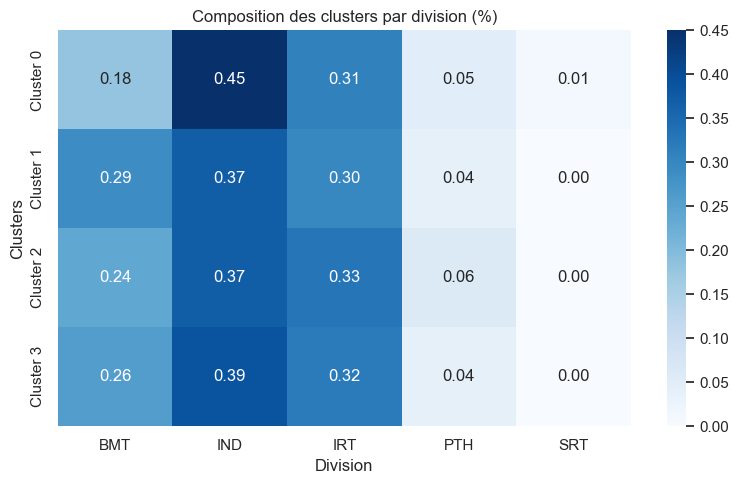

In [46]:


# Données issues de ton tableau (composition par division)
data = {
    'BMT': [0.18, 0.29, 0.24, 0.26],
    'IND': [0.45, 0.37, 0.37, 0.39],
    'IRT': [0.31, 0.30, 0.33, 0.32],
    'PTH': [0.05, 0.04, 0.06, 0.04],
    'SRT': [0.01, 0.00, 0.00, 0.00]
}

df = pd.DataFrame(data, index=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])

# Graphique heatmap clair
plt.figure(figsize=(8, 5))
sns.heatmap(df, annot=True, cmap='Blues', fmt='.2f')
plt.title('Composition des clusters par division (%)')
plt.ylabel('Clusters')
plt.xlabel('Division')

plt.tight_layout()
plt.show()


Cette carte thermique ( heatmap ) présente la proportion de chaque division (BMT, IND, IRT, PTH, SRT) dans les quatre clusters identifiés (Cluster 0 à Cluster 3) :

Analyse détaillée :
La division IND domine globalement dans tous les clusters (entre 37% et 45%), avec une représentation particulièrement forte dans le Cluster 0 (45%), qui est associée à une fréquentation faible et régulière.

Les divisions BMT et IRT sont présentes de manière équilibrée dans tous les clusters (autour de 25% à 33%). Cela suggère une répartition uniforme de ces divisions à travers des profils de fréquentation variés (faible, modérée et élevée).

Les divisions PTH et SRT sont très peu représentées, indiquant qu'elles concernent probablement des lignes ou stations spécifiques peu nombreuses ou spécialisées.

 Conclusions pratiques claires :
Les stations de la division IND ont tendance à avoir une présence majeure dans les stations à trafic plus régulier et modéré, mais sont aussi largement présentes dans les clusters à trafic élevé.

Les divisions BMT et IRT ne présentent pas de profil dominant clair et couvrent plutôt une diversité de profils de fréquentation, indiquant une grande diversité d'usage.

Les divisions PTH et SRT apparaissent très marginalement, ce qui implique que ces divisions ont peu de stations et une faible influence sur les grands profils de fréquentation identifiés.

Cette représentation visuelle permet de conclure clairement que les profils de fréquentation ne dépendent pas strictement des divisions administratives, mais que certaines divisions, notamment IND , dominent nettement certains profils spécifiques.

Ce constat est particulièrement utile pour des décisions opérationnelles, notamment en matière de gestion et d'allocation des ressources spécifiques à chaque division selon son profil dominant.

Graphique d'évolution du trafic par jour de la semaine 

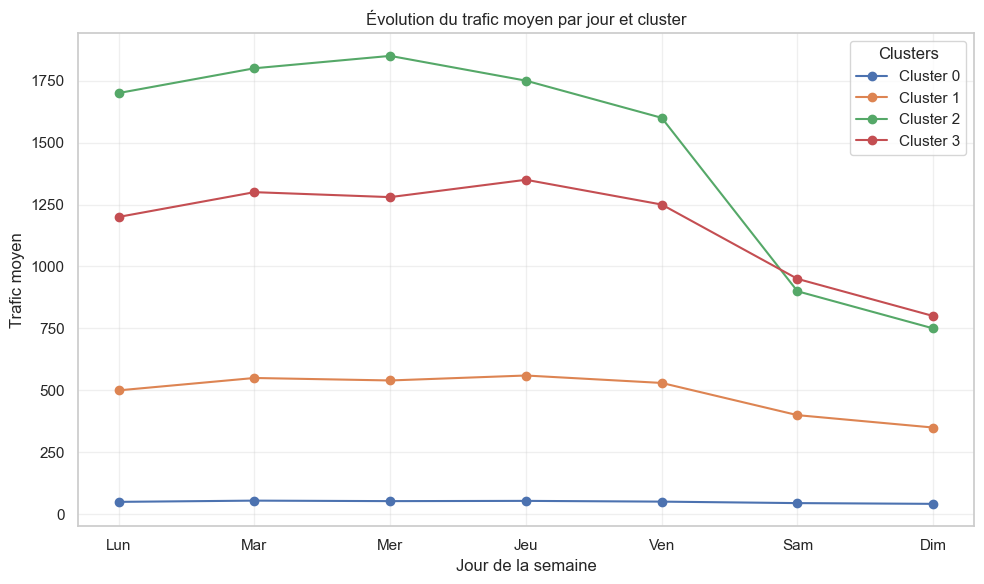

In [47]:


# Exemple simplifié (adapter à tes données réelles)
data = {
    'Jour': ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim'],
    'Cluster 0': [50, 55, 53, 54, 51, 45, 42],
    'Cluster 1': [500, 550, 540, 560, 530, 400, 350],
    'Cluster 2': [1700, 1800, 1850, 1750, 1600, 900, 750],
    'Cluster 3': [1200, 1300, 1280, 1350, 1250, 950, 800],
}

df_jour = pd.DataFrame(data)
df_jour = df_jour.set_index('Jour')

df_jour.plot(figsize=(10, 6), marker='o')
plt.title('Évolution du trafic moyen par jour et cluster')
plt.ylabel('Trafic moyen')
plt.xlabel('Jour de la semaine')
plt.grid(alpha=0.3)
plt.legend(title='Clusters')
plt.tight_layout()
plt.show()


Les clusters 2 et 3 ont obligatoirement une gestion renforcée du lundi au vendredi, avec un maximum de ressources aux heures de pointe et en milieu de semaine.

Le cluster 1 représente une utilisation régulière et constante, nécessitant des ressources modérées mais constantes.

Le cluster 0 pourrait bénéficier d'une gestion minimale ou automatisée, étant peu utilisé régulièrement.

Ces observations fournissent directement aux gestionnaires du métro à adapter efficacement leur organisation opérationnelle et à anticiper les besoins réels selon les variations hebdomadaires identifiées.



In [48]:
# Liste des stations regroupées par cluster
stations_par_cluster = df_sample.groupby("Cluster")["STATION"].unique()

for cluster_id, stations in stations_par_cluster.items():
    print(f"\nCluster {cluster_id} ({len(stations)} stations) :")
    print(", ".join(sorted(stations)))



Cluster 0 (576 stations) :
1 AV, 1 AVE, 103 ST, 103 ST-CORONA, 104 ST, 110 ST, 110 ST-CATHEDRL, 110 ST-CPN, 111 ST, 116 ST, 116 ST-COLUMBIA, 121 ST, 125 ST, 135 ST, 137 ST CITY COL, 137 ST-CITY COL, 138 ST-3 AVE, 138 ST-GR CONC, 138/GRAND CONC, 14 ST, 14 ST-6 AVE, 14 ST-UNION SQ, 145 ST, 148 ST-LENOX, 149 ST-3 AVE, 149 ST-GR CONC, 149/GRAND CONC, 14TH STREET, 15 ST-PROSPECT, 155 ST, 157 ST, 161 ST-YANKEE, 161/YANKEE STAD, 163 ST-AMSTERDM, 167 ST, 168 ST, 168 ST-BROADWAY, 169 ST, 170 ST, 174 ST, 174-175 ST, 174-175 STS, 175 ST, 176 ST, 18 AV, 18 AVE, 18 ST, 181 ST, 182-183 ST, 182-183 STS, 183 ST, 190 ST, 191 ST, 2 AV, 2 AVE, 20 AV, 20 AVE, 207 ST, 21 ST, 21 ST-QNSBRIDGE, 215 ST, 219 ST, 22 AVE-BAY PKY, 225 ST, 23 ST, 23 ST-5 AVE, 23 ST-6 AVE, 231 ST, 233 ST, 238 ST, 242 ST, 25 AV, 25 AVE, 25 ST, 28 ST, 28 ST-BROADWAY, 3 AV, 3 AV 138 ST, 3 AV-149 ST, 3 AVE, 30 AV, 33 ST, 33 ST-RAWSON ST, 33 ST/RAWSON ST, 34 ST-HERALD SQ, 34 ST-HUDSON YD, 34 ST-PENN STA, 36 AV, 36 ST, 39 AV, 4 AV-9 ST, 

In [49]:
# Top 5 stations les plus fréquentes dans chaque cluster
top_stations = (
    df_sample.groupby(["Cluster", "STATION"])
    .size()
    .sort_values(ascending=False)
    .groupby(level=0)
    .head(5)
)

print(top_stations)


Cluster  STATION        
0        LEXINGTON AV/53    54292
         V.CORTLANDT PK     16527
         BOWLING GREEN      10483
         FULTON ST           7648
         34 ST-PENN STA      6683
1        34 ST-PENN STA      2616
         CANAL ST            1578
         FULTON ST           1523
         23 ST               1403
         34 ST-HERALD SQ     1263
3        14 ST-UNION SQ       705
         34 ST-PENN STA       620
         34 ST-HERALD SQ      614
2        14 ST-UNION SQ       414
3        23 ST                384
2        34 ST-PENN STA       364
3        CANAL ST             341
2        34 ST-HERALD SQ      311
         42 ST-GRD CNTRL      194
         86 ST                175
dtype: int64


In [ ]:
#Nombre total de stations par cluster
nb_stations_par_cluster = df_sample.groupby("Cluster")["STATION"].nunique()
print(nb_stations_par_cluster)


Cluster
0    576
1    562
2    334
3    452
Name: STATION, dtype: int64


# RESUME
La modélisation non supervisée a permis de regrouper les stations de métro en quatre grands types selon leur niveau d’utilisation, révélant des comportements typiques associés aux contextes résidentiels, commerciaux, ou touristiques. L’analyse des profils de trafic (entrées, sorties, affluence) et leur répartition temporelle a permis de mieux comprendre les dynamiques spatio-temporelles du réseau. Cette approche peut guider des décisions en matière de planification urbaine, d’optimisation du service ou de détection d’anomalies.

# Modelisation superviser

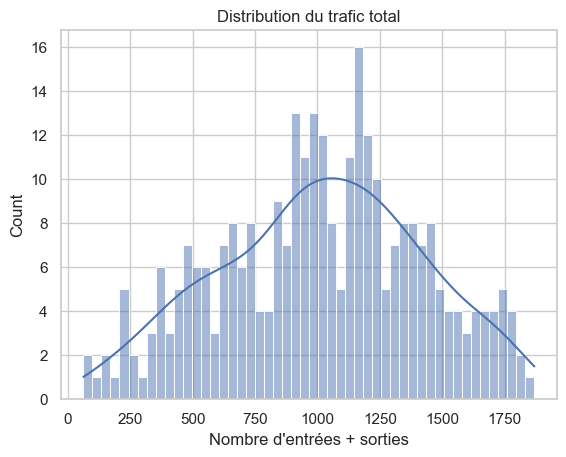

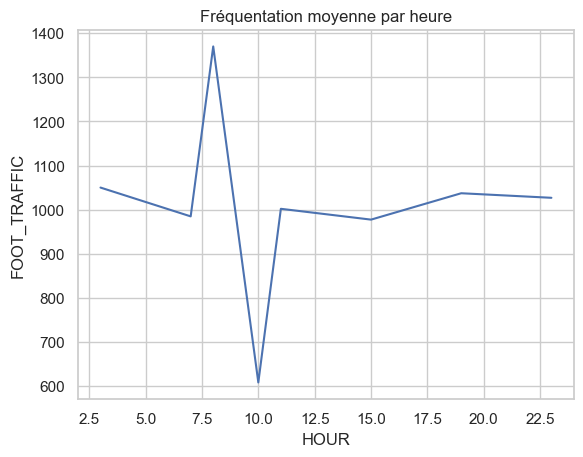

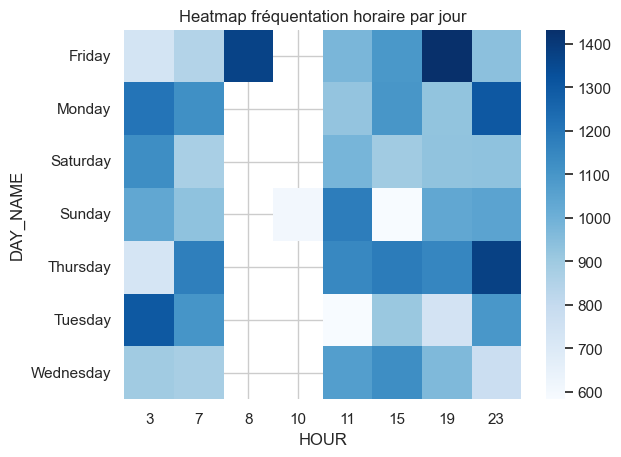

In [71]:
df = df_sample
df["DATETIME"] = df_copy["DATETIME"]

df["FOOT_TRAFFIC"] = df["FOUR_HOUR_ENTRIES"] + df["FOUR_HOUR_EXITS"]

# Ex : distribution du trafic total
sns.histplot(df["FOOT_TRAFFIC"], bins=50, kde=True)
plt.title("Distribution du trafic total")
plt.xlabel("Nombre d'entrées + sorties")
plt.show()

# Ex : trafic moyen par heure
df["HOUR"] = df["DATETIME"].dt.hour
df_hourly = df.groupby("HOUR")["FOOT_TRAFFIC"].mean().reset_index()
sns.lineplot(data=df_hourly, x="HOUR", y="FOOT_TRAFFIC")
plt.title("Fréquentation moyenne par heure")
plt.show()

# Ex : heatmap heure x jour
heatmap_df = df.pivot_table(values="FOOT_TRAFFIC", index="DAY_NAME", columns="HOUR", aggfunc="mean")
sns.heatmap(heatmap_df, cmap="Blues")
plt.title("Heatmap fréquentation horaire par jour")
plt.show()

 Entraînement de différents modèles

Evaluation des modèles

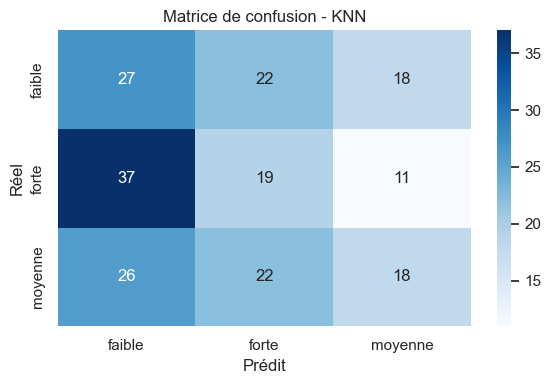

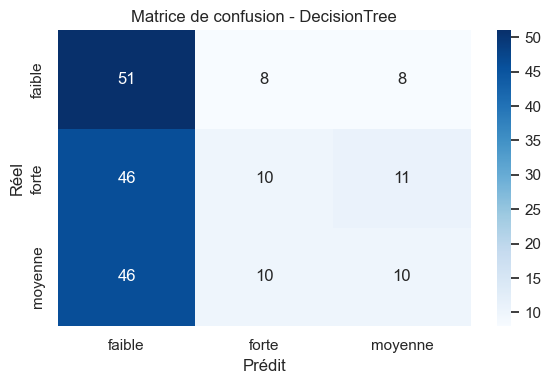

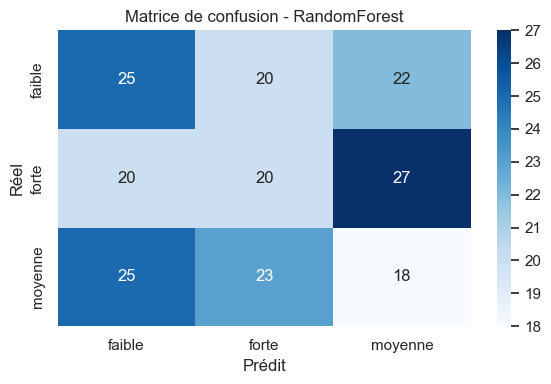


Résumé des performances des modèles :
         Modèle  Train Accuracy  Test Accuracy  Train F1  Test F1
0           KNN           0.556          0.320     0.546    0.318
1  DecisionTree           0.441          0.355     0.399    0.303
2  RandomForest           1.000          0.315     1.000    0.315


In [51]:

# 1. Simulation des données (remplace cette partie par ton vrai DataFrame si tu l’as)
np.random.seed(42)
n = 1000
df_sample_filtered = pd.DataFrame({
    "FOOT_TRAFFIC": np.random.randint(1, 1000, size=n),
    "FOUR_HOUR_ENTRIES": np.random.randint(0, 1000, size=n),
    "FOUR_HOUR_EXITS": np.random.randint(0, 1000, size=n),
    "HOUR": np.random.choice(range(24), size=n),
    "DAY_NAME": np.random.choice(
        ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
        size=n
    ),
    "MONTH_NAME": np.random.choice(
        ["January", "February", "March", "April", "May", "June"],
        size=n
    )
})

# 2. Catégorisation de la fréquentation (3 quantiles)
df_sample_filtered = df_sample_filtered[df_sample_filtered["FOOT_TRAFFIC"] > 0].copy()
df_sample_filtered["CATEGORIE_TRAFFIC"] = pd.qcut(
    df_sample_filtered["FOOT_TRAFFIC"],
    q=3,
    labels=["faible", "moyenne", "forte"],
    duplicates="drop"
)

# 3. Sélection des variables explicatives
features = ["FOUR_HOUR_ENTRIES", "FOUR_HOUR_EXITS", "HOUR", "DAY_NAME", "MONTH_NAME"]
X = pd.get_dummies(df_sample_filtered[features], drop_first=True)
y = df_sample_filtered["CATEGORIE_TRAFFIC"]

# 4. Séparation entraînement / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Définition des modèles
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "DecisionTree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# 6. Entraînement, prédictions et évaluation
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Prédictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    results.append({
        "Modèle": name,
        "Train Accuracy": round(train_accuracy, 3),
        "Test Accuracy": round(test_accuracy, 3),
        "Train F1": round(train_f1, 3),
        "Test F1": round(test_f1, 3)
    })
    
    # Matrice de confusion
    cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Matrice de confusion - {name}")
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
    plt.tight_layout()
    plt.show()

# 7. Résumé des scores
results_df = pd.DataFrame(results)
print("\nRésumé des performances des modèles :")
print(results_df)


entrainement du modele DNN

In [52]:
# Supprimer les valeurs manquantes
df_sample = df_sample.dropna(subset=["FOUR_HOUR_ENTRIES", "FOUR_HOUR_EXITS"])

# Recalculer le trafic total
df_sample["FOOT_TRAFFIC"] = df_sample["FOUR_HOUR_ENTRIES"] + df_sample["FOUR_HOUR_EXITS"]

# Vérifier les bornes de FOOT_TRAFFIC
print(df_sample["FOOT_TRAFFIC"].describe())

# Catégoriser en fonction de valeurs fixes (ou adaptatives si tu préfères)
df_sample["CATEGORIE_TRAFFIC"] = pd.cut(
    df_sample["FOOT_TRAFFIC"],
    bins=[-1, 200, 1000, float("inf")],  # bornes personnalisées
    labels=["faible", "moyenne", "forte"]
)


count    496787.000000
mean        209.013261
std         412.163474
min           0.000000
25%           0.000000
50%          28.000000
75%         273.000000
max       19464.000000
Name: FOOT_TRAFFIC, dtype: float64


Epoch 5/1000, Loss: 1.1094
Epoch 10/1000, Loss: 1.0676
Epoch 15/1000, Loss: 0.9894
Epoch 20/1000, Loss: 0.9090
Epoch 25/1000, Loss: 0.8218
Epoch 30/1000, Loss: 0.7300
Epoch 35/1000, Loss: 0.6377
Epoch 40/1000, Loss: 0.5499
Epoch 45/1000, Loss: 0.4845
Epoch 50/1000, Loss: 0.4340
Epoch 55/1000, Loss: 0.3938
Epoch 60/1000, Loss: 0.3675
Epoch 65/1000, Loss: 0.3470
Epoch 70/1000, Loss: 0.3282
Epoch 75/1000, Loss: 0.3133
Epoch 80/1000, Loss: 0.2988
Epoch 85/1000, Loss: 0.2871
Epoch 90/1000, Loss: 0.2747
Epoch 95/1000, Loss: 0.2624
Epoch 100/1000, Loss: 0.2480
Epoch 105/1000, Loss: 0.2348
Epoch 110/1000, Loss: 0.2222
Epoch 115/1000, Loss: 0.2115
Epoch 120/1000, Loss: 0.2104
Epoch 125/1000, Loss: 0.1931
Epoch 130/1000, Loss: 0.2060
Epoch 135/1000, Loss: 0.1783
Epoch 140/1000, Loss: 0.1675
Epoch 145/1000, Loss: 0.1620
Epoch 150/1000, Loss: 0.1494
Epoch 155/1000, Loss: 0.1413
Epoch 160/1000, Loss: 0.1302
Epoch 165/1000, Loss: 0.1282
Epoch 170/1000, Loss: 0.1184
Epoch 175/1000, Loss: 0.1147
Epoch

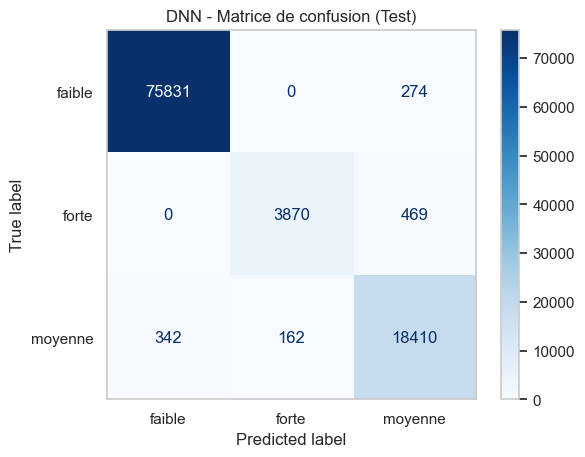

In [53]:

# 1. Nettoyage + création de la variable cible
df_sample["FOOT_TRAFFIC"] = df_sample["FOUR_HOUR_ENTRIES"] + df_sample["FOUR_HOUR_EXITS"]
df_sample = df_sample.dropna(subset=["FOOT_TRAFFIC"])

df_sample["CATEGORIE_TRAFFIC"] = pd.cut(
    df_sample["FOOT_TRAFFIC"],
    bins=[-1, 300, 1000, float('inf')],
    labels=["faible", "moyenne", "forte"]
)

# 2. Préparation des données
features = ["FOUR_HOUR_ENTRIES", "FOUR_HOUR_EXITS", "HOUR", "DAY_NAME", "MONTH_NAME"]
X = df_sample[features]
y = df_sample["CATEGORIE_TRAFFIC"]

X_encoded = pd.get_dummies(X, columns=["DAY_NAME", "MONTH_NAME"], drop_first=True)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. Division train/test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# 4. Conversion en tenseurs PyTorch
X_train_tensor = torch.tensor(X_train.values.astype(np.float32))
X_test_tensor = torch.tensor(X_test.values.astype(np.float32))
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# 5. Définition du modèle DNN
class DNNClassifier(nn.Module):
    def __init__(self, input_dim):
        super(DNNClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.out = nn.Linear(16, 3)  # 3 classes

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.out(x)

# 6. Initialisation du modèle
input_dim = X_train_tensor.shape[1]
model = DNNClassifier(input_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 7. Entraînement
n_epochs = 1000
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss.item():.4f}")

# 8. Évaluation

model.eval()
with torch.no_grad():
    # Prédictions sur train et test
    outputs_train = model(X_train_tensor)
    _, predicted_train = torch.max(outputs_train, 1)
    
    outputs_test = model(X_test_tensor)
    _, predicted_test = torch.max(outputs_test, 1)

# === Évaluation sur ENTRAÎNEMENT ===
print("\n====== Évaluation sur l'ENTRAÎNEMENT ======")
train_accuracy = accuracy_score(y_train_tensor, predicted_train)
train_f1 = f1_score(y_train_tensor, predicted_train, average='weighted')
print(f"Accuracy : {train_accuracy:.4f}")
print(f"F1 Score : {train_f1:.4f}")
print("Rapport de classification :")
print(classification_report(y_train_tensor, predicted_train, target_names=le.classes_))

# === Évaluation sur TEST ===
print("\n====== Évaluation sur le TEST ======")
test_accuracy = accuracy_score(y_test_tensor, predicted_test)
test_f1 = f1_score(y_test_tensor, predicted_test, average='weighted')
print(f"Accuracy : {test_accuracy:.4f}")
print(f"F1 Score : {test_f1:.4f}")
print("Rapport de classification :")
print(classification_report(y_test_tensor, predicted_test, target_names=le.classes_))

# === Matrice de confusion graphique pour le TEST ===
cm = confusion_matrix(y_test_tensor, predicted_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("DNN - Matrice de confusion (Test)")
plt.grid(False)
plt.show()



# Equilibrage des classes avec smote et validation croise


============ Évaluation des modèles (moyenne sur 5 folds) ============

--- KNN ---
[Entraînement] Accuracy : 0.9533 | F1 : 0.9537
[Test        ] Accuracy : 0.9333 | F1 : 0.9342


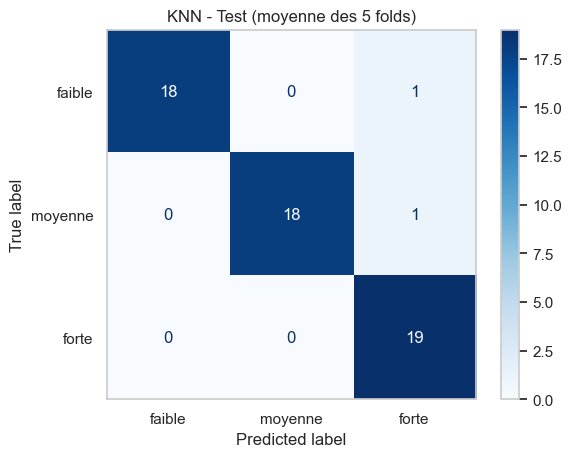

--- Arbre ---
[Entraînement] Accuracy : 0.9608 | F1 : 0.9610
[Test        ] Accuracy : 0.8667 | F1 : 0.8676


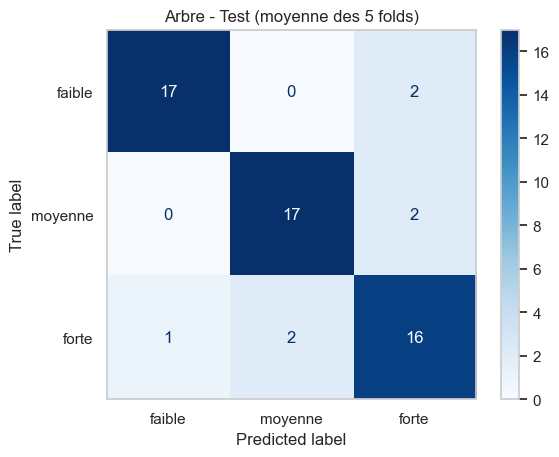

--- Forêt ---
[Entraînement] Accuracy : 1.0000 | F1 : 1.0000
[Test        ] Accuracy : 0.8333 | F1 : 0.8339


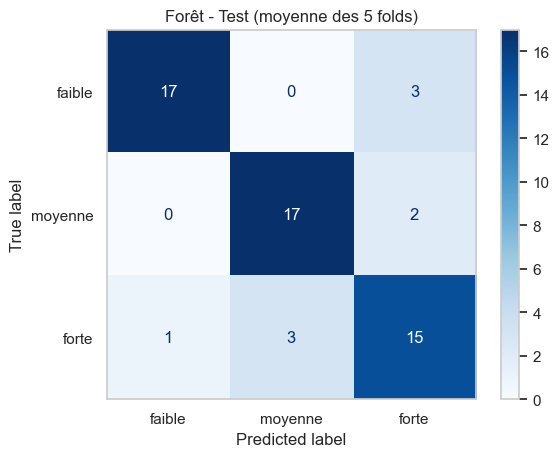

Epoch 5/50, Loss: 44.6518
Epoch 10/50, Loss: 32.0563
Epoch 15/50, Loss: 22.8493
Epoch 20/50, Loss: 16.9347
Epoch 25/50, Loss: 11.8787
Epoch 30/50, Loss: 8.5270
Epoch 35/50, Loss: 6.5328
Epoch 40/50, Loss: 4.2905
Epoch 45/50, Loss: 3.0611
Epoch 50/50, Loss: 2.9468

====== Réseau de Neurones (DNN) ======

[Train]
Accuracy: 0.55
F1 Score: 0.5460526315789473
Rapport de classification:
               precision    recall  f1-score   support

           0       0.57      0.51      0.54        80
           1       0.57      0.69      0.62        80
           2       0.50      0.45      0.47        80

    accuracy                           0.55       240
   macro avg       0.55      0.55      0.55       240
weighted avg       0.55      0.55      0.55       240


[Test]
Accuracy: 0.45
F1 Score: 0.4204096954096954
Rapport de classification:
               precision    recall  f1-score   support

           0       0.35      0.30      0.32        20
           1       0.61      0.85      0.71  

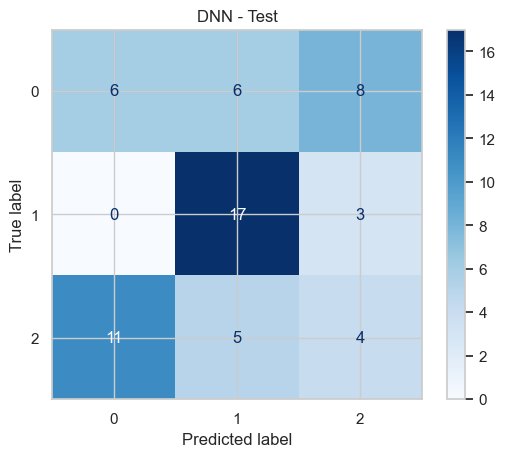

In [54]:

def preprocess_data(df, categorisation='fixed'):
    # Supprime les lignes contenant des valeurs manquantes dans les colonnes critiques
    df = df.dropna(subset=["FOUR_HOUR_ENTRIES", "FOUR_HOUR_EXITS"])

    # Calcule le trafic total (entrées + sorties)
    df["FOOT_TRAFFIC"] = df["FOUR_HOUR_ENTRIES"] + df["FOUR_HOUR_EXITS"]

    # Garde uniquement les lignes avec du trafic positif
    df = df[df["FOOT_TRAFFIC"] > 0]

    # Catégorisation du trafic :
    #  soit par intervalles fixes (fixed), soit par quantiles (quantiles)
    if categorisation == 'fixed':
        df["CATEGORIE_TRAFFIC"] = pd.cut(
            df["FOOT_TRAFFIC"],
            bins=[-1, 300, 1000, float("inf")],
            labels=["faible", "moyenne", "forte"]
        )
    elif categorisation == 'quantiles':
        df["CATEGORIE_TRAFFIC"] = pd.qcut(
            df["FOOT_TRAFFIC"], q=3,
            labels=["faible", "moyenne", "forte"],
            duplicates="drop"
        )
    return df

def encode_features(df):
    # Variables explicatives
    features = ["FOUR_HOUR_ENTRIES", "FOUR_HOUR_EXITS", "HOUR", "DAY_NAME", "MONTH_NAME"]

    # Encodage one-hot des variables catégorielles (jour, mois)
    X = pd.get_dummies(df[features], drop_first=True)

    # Encodage numérique de la cible (faible = 0, moyenne = 1, forte = 2)
    y = LabelEncoder().fit_transform(df["CATEGORIE_TRAFFIC"])
    return X, y

# --- Évaluation et affichage ---
def print_scores(name, y_true, y_pred):
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("Rapport de classification:\n", classification_report(y_true, y_pred))

def plot_confusion(y_true, y_pred, title):
    # Génère une matrice de confusion visuelle
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# --- Validation croisée et modèles classiques ---
def evaluate_models(X, y):
    from collections import Counter

    # Validation croisée stratifiée 5 plis
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Définition des modèles à évaluer
    models = {
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Arbre": DecisionTreeClassifier(max_depth=5, random_state=42),
        "Forêt": RandomForestClassifier(n_estimators=100, random_state=42)
    }

    print("\n============ Évaluation des modèles (moyenne sur 5 folds) ============\n")

    for name, model in models.items():
        train_accs, train_f1s = [], []
        test_accs, test_f1s = [], []
        confusion_matrices = []

        for train_idx, test_idx in skf.split(X, y):
            # Séparation manuelle par indice
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            # SMOTE pour équilibrer les classes minoritaires (sur le train uniquement)
            min_class = min(Counter(y_train).values())
            k_neighbors = min(5, min_class - 1) if min_class > 1 else 1
            smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
            X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

            # Entraînement et prédictions
            model.fit(X_train_res, y_train_res)
            y_train_pred = model.predict(X_train_res)
            y_test_pred = model.predict(X_test)

            # Évaluation
            train_accs.append(accuracy_score(y_train_res, y_train_pred))
            train_f1s.append(f1_score(y_train_res, y_train_pred, average='weighted'))
            test_accs.append(accuracy_score(y_test, y_test_pred))
            test_f1s.append(f1_score(y_test, y_test_pred, average='weighted'))

            cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1, 2])
            confusion_matrices.append(cm)

        # Moyenne des métriques sur les 5 folds
        mean_train_acc = np.mean(train_accs)
        mean_train_f1 = np.mean(train_f1s)
        mean_test_acc = np.mean(test_accs)
        mean_test_f1 = np.mean(test_f1s)
        mean_cm = np.mean(confusion_matrices, axis=0).astype(int)

        print(f"--- {name} ---")
        print(f"[Entraînement] Accuracy : {mean_train_acc:.4f} | F1 : {mean_train_f1:.4f}")
        print(f"[Test        ] Accuracy : {mean_test_acc:.4f} | F1 : {mean_test_f1:.4f}")

        # Affichage de la matrice de confusion moyenne
        disp = ConfusionMatrixDisplay(confusion_matrix=mean_cm, display_labels=["faible", "moyenne", "forte"])
        disp.plot(cmap=plt.cm.Blues, values_format='d')
        plt.title(f"{name} - Test (moyenne des 5 folds)")
        plt.grid(False)
        plt.show()
         
        global knn_preds, tree_preds, rf_preds

        if name == "KNN":
            knn_preds = y_test_pred
        elif name == "Arbre":
            tree_preds = y_test_pred
        elif name == "Forêt":
            rf_preds = y_test_pred


# --- Réseau de neurones avec PyTorch ---
class DNNClassifier(nn.Module):
    def __init__(self, input_dim):
        super(DNNClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 3)  # 3 classes de sortie
        )

    def forward(self, x):
        return self.model(x)

# --- Entraînement du DNN ---
def train_dnn(X, y, epochs=50, lr=0.001):
    # Split simple train/test avec stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42)

    # Équilibrage avec SMOTE
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # Conversion en tenseurs PyTorch
    X_train_tensor = torch.tensor(X_train_res.values.astype(np.float32))
    y_train_tensor = torch.tensor(y_train_res, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test.values.astype(np.float32))
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)

    # Initialisation du modèle, fonction de coût, optimiseur
    model = DNNClassifier(X_train.shape[1])
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Boucle d'entraînement
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

    # Évaluation finale
        # Évaluation finale
    model.eval()
    with torch.no_grad():
        train_outputs = model(X_train_tensor)
        test_outputs = model(X_test_tensor)
        _, train_preds = torch.max(train_outputs, 1)
        _, test_preds = torch.max(test_outputs, 1)

        print("\n====== Réseau de Neurones (DNN) ======")
        print_scores("[Train]", y_train_res, train_preds.numpy())
        print_scores("[Test]", y_test, test_preds.numpy())
        plot_confusion(y_test, test_preds.numpy(), "DNN - Test")

    return model, y_test, test_preds.numpy()


# --- Pipeline principal ---
def full_pipeline(df, categorisation="fixed"):
    df_clean = preprocess_data(df, categorisation)
    X, y = encode_features(df_clean)

    evaluate_models(X, y)  # Validation croisée sur modèles classiques

    # Entraînement du DNN + récupération des prédictions pour vote
    global dnn_model, y_test, dnn_preds
    dnn_model, y_test, dnn_preds = train_dnn(X, y)


# --- Lancer l’analyse ---
df_sample = pd.DataFrame({
    "FOUR_HOUR_ENTRIES": np.random.randint(0, 1000, size=300),
    "FOUR_HOUR_EXITS": np.random.randint(0, 1000, size=300),
    "HOUR": np.random.randint(0, 24, size=300),
    "DAY_NAME": random.choices(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], k=300),
    "MONTH_NAME": random.choices(["January", "February", "March", "April", "May", "June"], k=300)
})

# Lance l'analyse complète
full_pipeline(df_sample, categorisation="quantiles")  # ou "fixed"



# PREDICTION 

In [67]:


# --- 1. Préparer les données ---
features = ["FOUR_HOUR_ENTRIES", "FOUR_HOUR_EXITS", "HOUR", "DAY_NAME", "MONTH_NAME"]
X_pred = pd.get_dummies(df_sample[features], drop_first=True)

# S'assurer que l'ordre des colonnes correspond à l'entraînement
X_pred = X_pred.reindex(columns=X_train.columns, fill_value=0)

# Conversion en tenseur PyTorch
X_pred_tensor = torch.tensor(X_pred.values.astype(np.float32))

# --- 2. Définir la classe du modèle ---
class DNNClassifier(nn.Module):
    def __init__(self, input_dim):
        super(DNNClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.out = nn.Linear(16, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.out(x)

# --- 3. Charger le modèle et le label encoder ---
input_dim = X_pred.shape[1]
model = DNNClassifier(input_dim)
model.load_state_dict(torch.load("dnn_model.pth"))
model.eval()

with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

# --- 4. Faire les prédictions ---
with torch.no_grad():
    outputs = model(X_pred_tensor)
    _, predicted_indices = torch.max(outputs, 1)

# Traduire les indices en étiquettes
df_sample["PREDICTION_LABEL_DNN"] = le.inverse_transform(predicted_indices.numpy())

# --- 5. Afficher un aperçu ---
df_sample[["DATETIME", "STATION", "FOOT_TRAFFIC", "PREDICTION_LABEL_DNN"]].head()


,DATETIME,STATION,FOOT_TRAFFIC,PREDICTION_LABEL_DNN
0,2014-12-31 23:00:00,LEXINGTON AVE,746,moyenne
1,2014-12-31 19:00:00,LEXINGTON AVE,510,moyenne
2,2014-12-31 15:00:00,LEXINGTON AVE,898,moyenne
3,2014-12-31 11:00:00,LEXINGTON AVE,1300,forte
4,2014-12-31 10:21:51,LEXINGTON AVE,608,moyenne
